# Autoencoder

入力と出力がおなじになるようにニューラルネットワークを学習させるもの。

source: https://elix-tech.github.io/ja/2016/07/17/autoencoder.html

Undercomplete Autoencorder: エンコードの次元が入力の次元よりも小さくなるようなもの
Overcomplete Autoencorder: 入力よりもエンコード後の次元数の方が大きいもの

## Undercomplete Autoencoderの実装

1層しかないシンプルなNN。
loss: 0.1032 - val_loss: 0.1014

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

# モデル定義
input_dim = 784
encoding_dim = 32
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# データ入力
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# トレーニング
hist = autoencoder.fit(x_train, x_train,
                nb_epoch=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Using TensorFlow backend.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s - loss: 0.3663 - val_loss: 0.2725
Epoch 2/50
60000/60000 [==============================] - 4s - loss: 0.2652 - val_loss: 0.2549
Epoch 3/50
60000/60000 [==============================] - 4s - loss: 0.2454 - val_loss: 0.2336
Epoch 4/50
60000/60000 [==============================] - 4s - loss: 0.2248 - val_loss: 0.2139
Epoch 5/50
60000/60000 [==============================] - 4s - loss: 0.2078 - val_loss: 0.1995
Epoch 6/50
60000/60000 [==============================] - 4s - loss: 0.1956 - val_loss: 0.1892
Epoch 7/50
60000/60000 [==============================] - 4s - loss: 0.1866 - val_loss: 0.1812
Epoch 8/50
60000/60000 [==============================] - 4s - loss: 0.1794 - val_loss: 0.1747
Epoch 9/50
60000/60000 [==============================] - 4s - loss: 0.1734 - val_loss: 0.1691
Epoch 10/50
60000/60000 [==============================] - 4s - loss: 0.1682 - val_loss: 0.1643

min loss:  0.103549048658  min val_loss: 0.101753731632


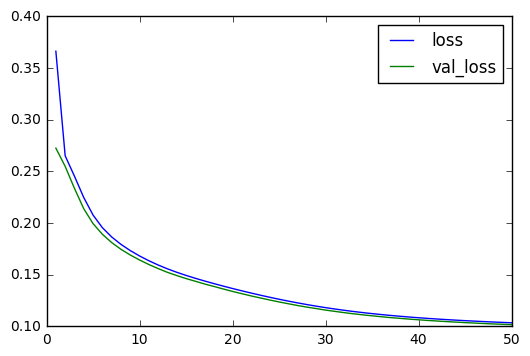

In [2]:
# ヒストリーを表示
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(history):
    print('min loss: ', np.min(history['loss']), ' min val_loss:', np.min(history['val_loss']))
    xlin = range(1, len(history['loss'])+1)
    plt.plot(xlin, history['loss'], label='loss')
    plt.plot(xlin, history['val_loss'], label='val_loss')
    plt.legend()
    plt.show()

plot_history(hist.history)

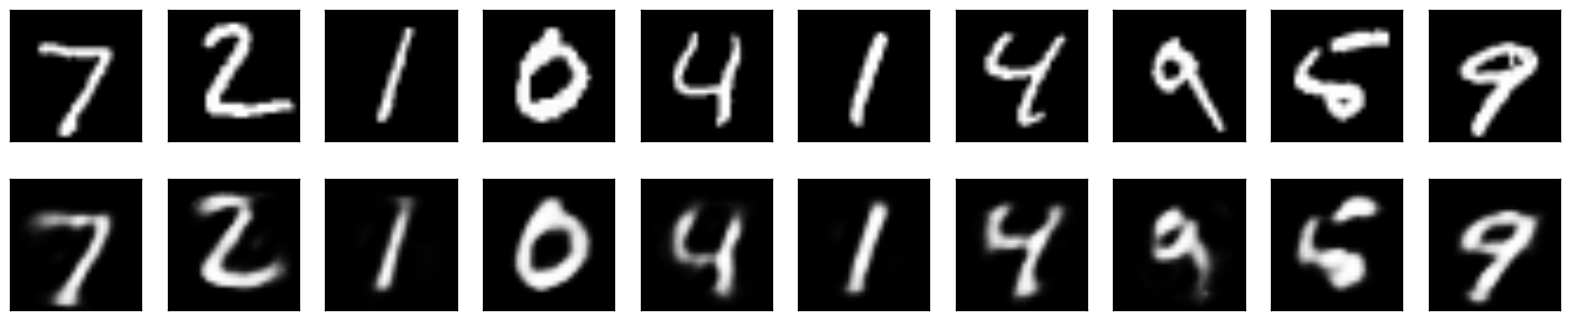

In [3]:
def plot_images(X, model):
    # テスト画像を変換
    decoded_imgs = model.predict(X)

    # 何個表示するか
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # オリジナルのテスト画像を表示
        ax = plt.subplot(2, n, i+1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # 変換された画像を表示
        ax = plt.subplot(2, n, i+1+n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

    
plot_images(x_test, autoencoder)

In [4]:
# 中間層の平均活性度をみる
encoder = Model(input=input_img, output=encoded)
encoded_imgs = encoder.predict(x_test)

print('encoded img mean:', encoded_imgs.mean())

encoded img mean: 7.5101


## Sparse Autoencoder

損失関数にペナルティをいれることで、中間層で活性化するニューロンがより少なくなり疎になる。少ないニューロンの発火で再現できる方がエネルギー効率の面で良いはず

In [10]:
from keras import regularizers

encoding_dim = 32
input_img = Input(shape=(784,))

# activity regularizerを加える
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.activity_l1(1e-4))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
hist = autoencoder.fit(x_train, x_train,
                nb_epoch=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s - loss: 0.6551 - val_loss: 0.6155
Epoch 2/100
60000/60000 [==============================] - 5s - loss: 0.5832 - val_loss: 0.5534
Epoch 3/100
60000/60000 [==============================] - 5s - loss: 0.5274 - val_loss: 0.5037
Epoch 4/100
60000/60000 [==============================] - 4s - loss: 0.4827 - val_loss: 0.4637
Epoch 5/100
60000/60000 [==============================] - 5s - loss: 0.4466 - val_loss: 0.4313
Epoch 6/100
60000/60000 [==============================] - 4s - loss: 0.4173 - val_loss: 0.4050
Epoch 7/100
60000/60000 [==============================] - 4s - loss: 0.3934 - val_loss: 0.3834
Epoch 8/100
60000/60000 [==============================] - 5s - loss: 0.3738 - val_loss: 0.3656
Epoch 9/100
60000/60000 [==============================] - 4s - loss: 0.3576 - val_loss: 0.3508
Epoch 10/100
60000/60000 [==============================] - 4s - loss: 0.3442 - val_lo

min loss:  0.262797870588  min val_loss: 0.262504656172


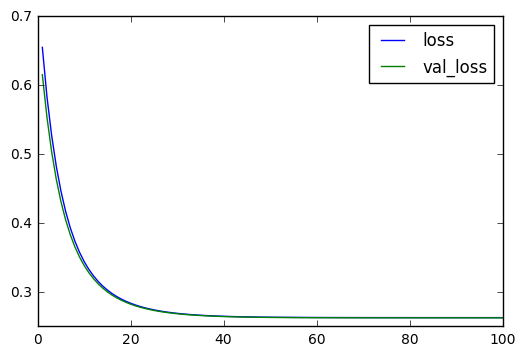

In [11]:
plot_history(hist.history)

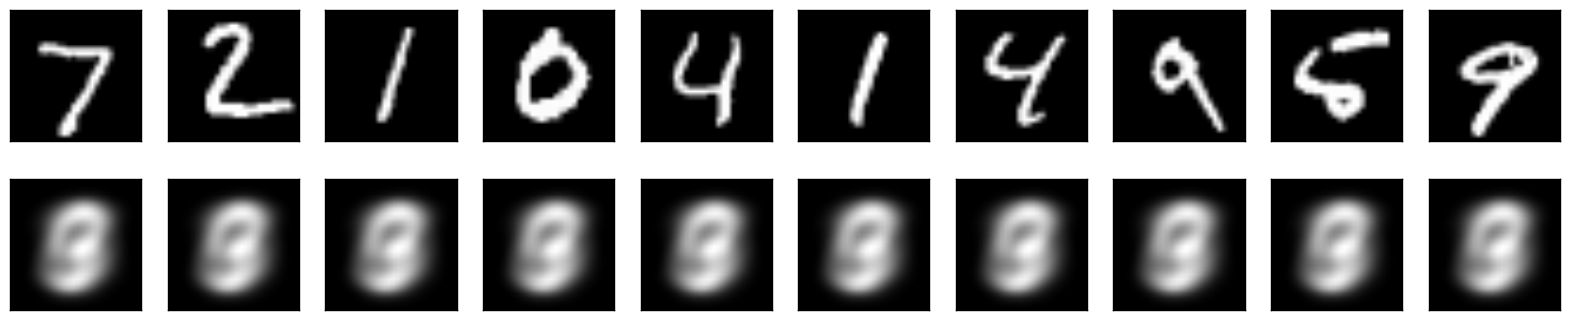

In [12]:
plot_images(x_test, autoencoder)

In [13]:
# 中間層の平均活性度をみる
encoder = Model(input=input_img, output=encoded)
encoded_imgs = encoder.predict(x_test)

print('encoded img mean:', encoded_imgs.mean())

encoded img mean: 2.02299e-06


## Deep Autoencoder

中間層の数を増やして深くすることを考える。

In [14]:
encoding_dim = 32
input_img = Input(shape=(784,))

encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input=input_img, output=decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
hist = autoencoder.fit(x_train, x_train,
                nb_epoch=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 9s - loss: 0.2409 - val_loss: 0.1658
Epoch 2/100
60000/60000 [==============================] - 9s - loss: 0.1499 - val_loss: 0.1352
Epoch 3/100
60000/60000 [==============================] - 9s - loss: 0.1298 - val_loss: 0.1229
Epoch 4/100
60000/60000 [==============================] - 8s - loss: 0.1209 - val_loss: 0.1164
Epoch 5/100
60000/60000 [==============================] - 8s - loss: 0.1154 - val_loss: 0.1123
Epoch 6/100
60000/60000 [==============================] - 8s - loss: 0.1118 - val_loss: 0.1088
Epoch 7/100
60000/60000 [==============================] - 8s - loss: 0.1089 - val_loss: 0.1063
Epoch 8/100
60000/60000 [==============================] - 9s - loss: 0.1063 - val_loss: 0.1039
Epoch 9/100
60000/60000 [==============================] - 8s - loss: 0.1040 - val_loss: 0.1017
Epoch 10/100
60000/60000 [==============================] - 9s - loss: 0.1020 - val_lo

min loss:  0.081470640103  min val_loss: 0.0812778130531


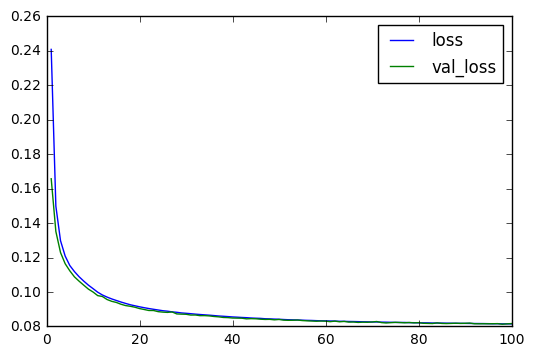

In [15]:
plot_history(hist.history)

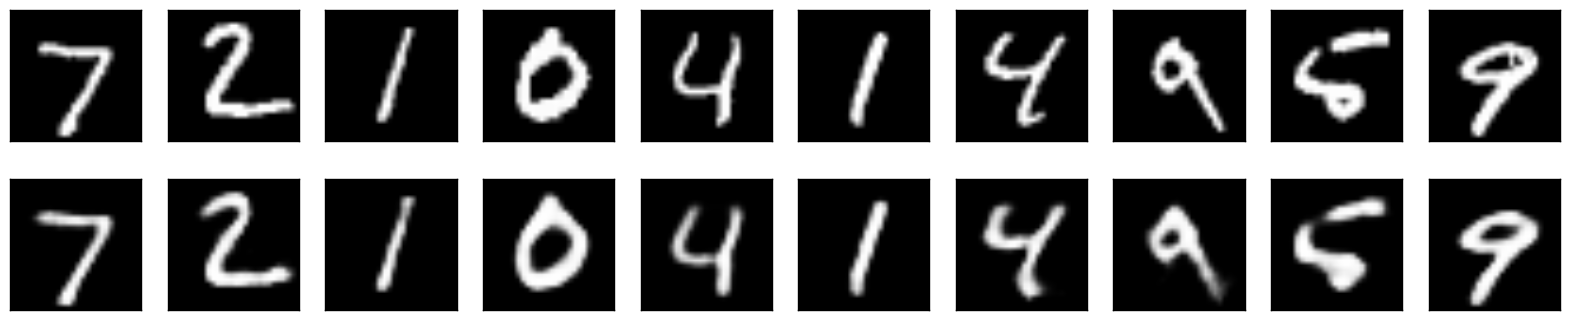

In [16]:
plot_images(x_test, autoencoder)

In [17]:
# 中間層の平均活性度をみる
encoder = Model(input=input_img, output=encoded)
encoded_imgs = encoder.predict(x_test)

print('encoded img mean:', encoded_imgs.mean())

encoded img mean: 8.05585


## Convolutional Autoencoder

CNNを使うことを考える。

In [18]:
from keras.layers import Input, Convolution2D, MaxPooling2D, UpSampling2D
from keras.models import Model

input_img = Input(shape=(28, 28, 1))

x = Convolution2D(16, 3, 3, activation='relu', border_mode='same')(input_img)
x = MaxPooling2D((2, 2), border_mode='same')(x)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)
x = MaxPooling2D((2, 2), border_mode='same')(x)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)
encoded = MaxPooling2D((2, 2), border_mode='same')(x)

x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(16, 3, 3, activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Convolution2D(1, 3, 3, activation='sigmoid', border_mode='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# データの準備
(x_train2d, _), (x_test2d, _) = mnist.load_data()

x_train2d = x_train2d.astype('float32') / 255.
x_test2d = x_test2d.astype('float32') / 255.
x_train2d = np.reshape(x_train2d, (len(x_train2d), 28, 28, 1))
x_test2d = np.reshape(x_test2d, (len(x_test2d), 28, 28, 1))

# 学習
autoencoder.fit(x_train2d, x_train2d,
                       nb_epoch=50,
                       batch_size=128,
                       shuffle=True,
                       validation_data=(x_test2d, x_test2d))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 113s - loss: 0.2178 - val_loss: 0.1369
Epoch 2/50
60000/60000 [==============================] - 114s - loss: 0.1280 - val_loss: 0.1204
Epoch 3/50
60000/60000 [==============================] - 115s - loss: 0.1180 - val_loss: 0.1139
Epoch 4/50
60000/60000 [==============================] - 113s - loss: 0.1131 - val_loss: 0.1101
Epoch 5/50
60000/60000 [==============================] - 114s - loss: 0.1101 - val_loss: 0.1076
Epoch 6/50
60000/60000 [==============================] - 114s - loss: 0.1079 - val_loss: 0.1059
Epoch 7/50
60000/60000 [==============================] - 114s - loss: 0.1062 - val_loss: 0.1044
Epoch 8/50
60000/60000 [==============================] - 114s - loss: 0.1048 - val_loss: 0.1032
Epoch 9/50
60000/60000 [==============================] - 114s - loss: 0.1035 - val_loss: 0.1017
Epoch 10/50
60000/60000 [==============================] - 114s - loss: 0.102

min loss:  0.081470640103  min val_loss: 0.0812778130531


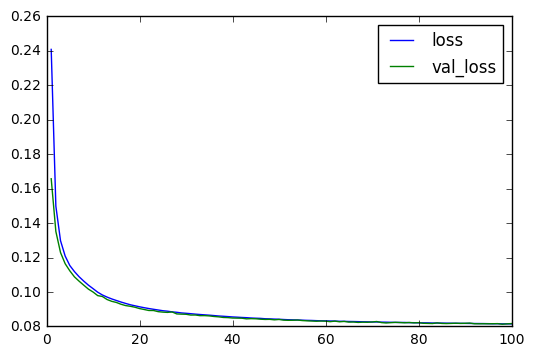

In [20]:
plot_history(hist.history)

In [30]:
# 中間層の平均活性度をみる
encoder = Model(input=input_img, output=encoded)
encoded_imgs = encoder.predict(x_test2d)

print('encoded img mean:', encoded_imgs.mean())

encoded img mean: 5.17917
